In [1]:
import cv2
import glob
import numpy as np
import statistics
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import timeit
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

In [18]:
path = glob.glob('./DS_OLD/DS_Official_African_Raw_Male/*.jpg')

In [19]:
len(path)

3350

In [20]:
gen_path = './DS_Bulk_AFRO_Male/Allsize/AFR_Male_2_'

200 faces so far
400 faces so far
600 faces so far
800 faces so far
1000 faces so far
1200 faces so far
1400 faces so far
1600 faces so far
1800 faces so far
2000 faces so far
2200 faces so far
2400 faces so far
2600 faces so far
2800 faces so far
3000 faces so far
3200 faces so far
3400 faces so far
3600 faces so far
3800 faces so far
4000 faces so far
4200 faces so far
4400 faces so far
4600 faces so far
4800 faces so far
5000 faces so far
5200 faces so far
--FINISHED--
Faces Found:  5331 from 3333 images
Efficiency: 159.95 %
--Shuffled--


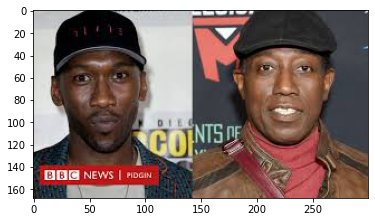

In [21]:
# load image from file

# create the detector, using default weights
detector = MTCNN()
# detect faces in the image

# display faces on the original image
#draw_image_with_boxes(filename, faces)
#print(len(face_list))


numberOfImage = 0
numberOfFace = 0
face_list = []
width_of_face = []

ii = 0
for file in path:
# load the image
    pixels = pyplot.imread(file)
    data = pyplot.imread(file)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    #ax = pyplot.gca()
    # plot each box
    try:
        result_list = detector.detect_faces(pixels)
    except:
        continue
    
    img = cv2.imread(file)
    ori_img = img
    
    jj = 0
    for result in result_list:
    # get coordinates
        x, y, width, height = result['box']
        # create the shape
        if (height > width):
            width = width+ int(abs(height-width))
        #print(x,y,width,height)
        
        x1 = int(x - 0.15*width)
        y1 = int(y - 0.15*height)
        
        small_fact = int(0.15*height)
        
        top_border = y1
        bottom_border = y + height + small_fact
        left_border = x1 
        right_border = x + width + small_fact
        
        try:
            face_cropped = ori_img[top_border:bottom_border, left_border:right_border]
            #face_resized = cv2.resize (face_cropped,(256,256),interpolation=cv2.INTER_LANCZOS4)
            face_list.append(face_cropped)
            cv2.imwrite(gen_path+str(ii)+'_'+str(jj)+'.jpg', face_cropped)
            width_of_face.append(right_border-left_border)
        except:
            continue
        #rect = Rectangle((x1, y1), width*1.3, height*1.3, fill=False, color='red')
        #print(x1,y1,width*1.3,height*1.3)
        # draw the box
        #ax.add_patch(rect)
        # show the plot
        #print()
    #pyplot.show()
        numberOfFace+=1
        jj +=1
        if (numberOfFace %200 ==0):
            print(numberOfFace,'faces so far')
    numberOfImage +=1
    ii +=1
    
print('--FINISHED--')
print('Faces Found: ', numberOfFace, 'from', numberOfImage,'images')
print('Efficiency:',round(numberOfFace/numberOfImage*100,2),'%')
random.shuffle(face_list)
print('--Shuffled--')

In [11]:
len(face_list)

830

In [16]:
def Average(lst):
	return sum(lst) / len(lst)

In [15]:
Average(image_sizes)

NameError: name 'Average' is not defined

In [17]:
image_sizes = []

for i in range (len(face_list)):
    image_sizes.append(face_list[i].shape[0])
    
print('--OUTPUTING FACES')
print('------------------')
start = timeit.default_timer()
#gen_path = './02_Datasets/01_High_Res Image_Datasets_Bulk/White_Man_Faces_Highres/Wh_MH'
gen_path = './DS_Bulk_EUR_Male/Bigsize/Eur_man_21M_'
suffix = '.jpg'
succes = 0

for i in range(len(face_list)):
    try:
        if (face_list[i].shape[0] >= Average(image_sizes)):
            if (i < 10):
                prefix ='000'
            elif (i < 100):
                prefix = '00'
            else:
                prefix = '0'
            try:
                cv2.imwrite(gen_path+prefix+str(i)+suffix, face_list[i])
            except:
                continue
            succes +=1
        else:
            continue
    except:
        continue

end = timeit.default_timer()
print(succes ,'Images are Exported')
print('Time: ',int((end-start)//60),'Minutes, ', int((end-start)%60),' Seconds')

--OUTPUTING FACES
------------------
346 Images are Exported
Time:  0 Minutes,  0  Seconds


In [12]:
try:
    #print('Average Face Size in this Frame',Average(width_of_face))
    #print('--360P IMAGES---')
    print('Max. Face Size in this Frame',max(width_of_face))
    print('Min. Face Size in this Frame',min(width_of_face))
    print('Average Face size so far:',Average(image_sizes))
    data = Counter(width_of_face)
    get_mode = dict(data)
    mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]
    print('Mode = Face Size in this Frame', mode)
    sns.displot(width_of_face)
except:
    print('No Faces Found')
    pass



Max. Face Size in this Frame 214
Min. Face Size in this Frame 13
No Faces Found


In [7]:
type(face_list[0])

numpy.ndarray

In [13]:
image_sizes = []

for i in range (len(face_list)):
    image_sizes.append(face_list[i].shape[0])

In [14]:
Average(image_sizes)

63.226936270084856

In [44]:
# Python program to get average of a list
def Average(lst):
	return sum(lst) / len(lst)

# Driver Code
lst = [15, 9, 55, 41, 35, 20, 62, 49]
average = Average(lst)

# Printing average of the list
print("Average of the list =", round(average, 2))


Average of the list = 35.75
